In [322]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import glob

In [323]:
df = None

for name in glob.glob('test_with_backup_and_byzantine_node_ramp_up_*'):
    if df is None:
        df = pd.read_json(name)
    else:
        df = df.append(pd.read_json(name))

df = df.replace(np.nan,0)


In [324]:
# filter out the requests that timed out

df = df[df["avg_duration"]> 0.0] 

In [325]:
df

,client_request,view_change,new_view,pre_prepare,prepare,commit,send_response,byzantine_node_cnt,backup_cnt,avg_duration,idx
0,29,81.0,9.0,153.0,1224.0,1377.0,153.0,1,9,12.330529,0
1,1,0.0,0.0,9.0,72.0,81.0,9.0,1,9,0.061022,1
2,29,81.0,9.0,153.0,1224.0,1377.0,153.0,1,9,12.296967,2
3,32,100.0,10.0,190.0,1710.0,1900.0,190.0,1,10,12.351665,0
4,1,0.0,0.0,10.0,90.0,100.0,10.0,1,10,0.025015,1
...,...,...,...,...,...,...,...,...,...,...,...
94,1,0.0,0.0,18.0,252.0,270.0,15.0,4,18,0.089024,1
95,1,0.0,0.0,18.0,234.0,252.0,14.0,5,18,0.122209,2
96,1,0.0,0.0,19.0,247.0,266.0,14.0,6,19,0.112575,0
97,21,247.0,19.0,38.0,494.0,532.0,28.0,6,19,4.075739,1


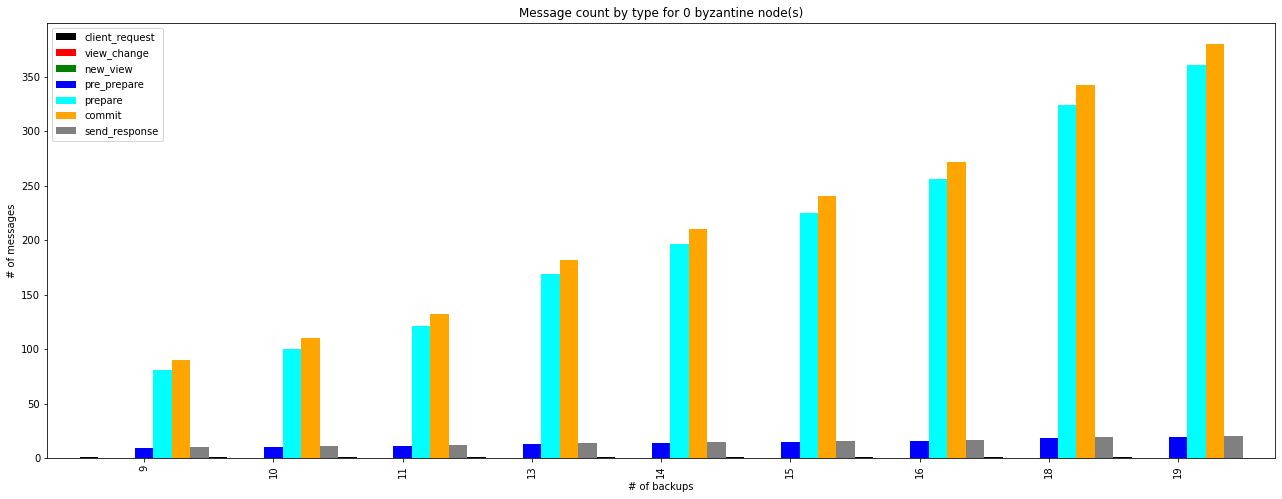

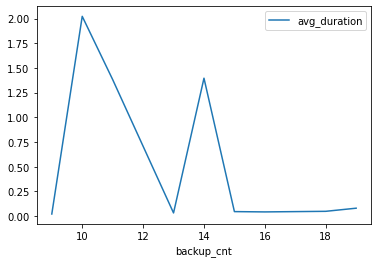

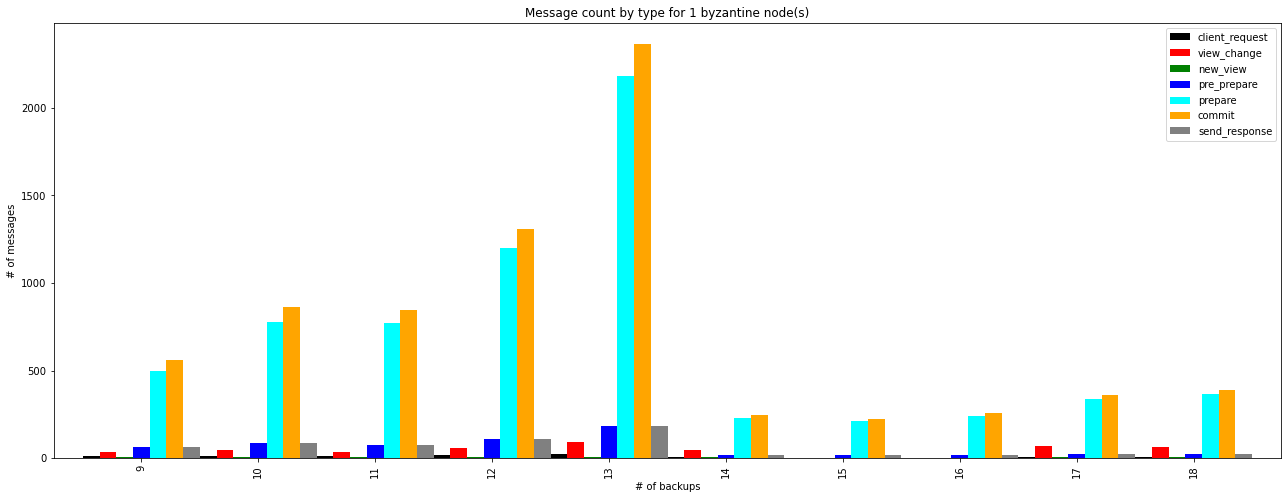

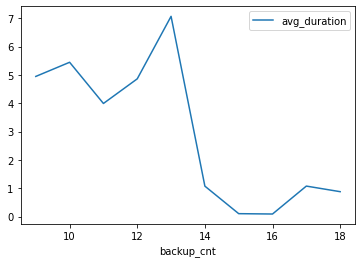

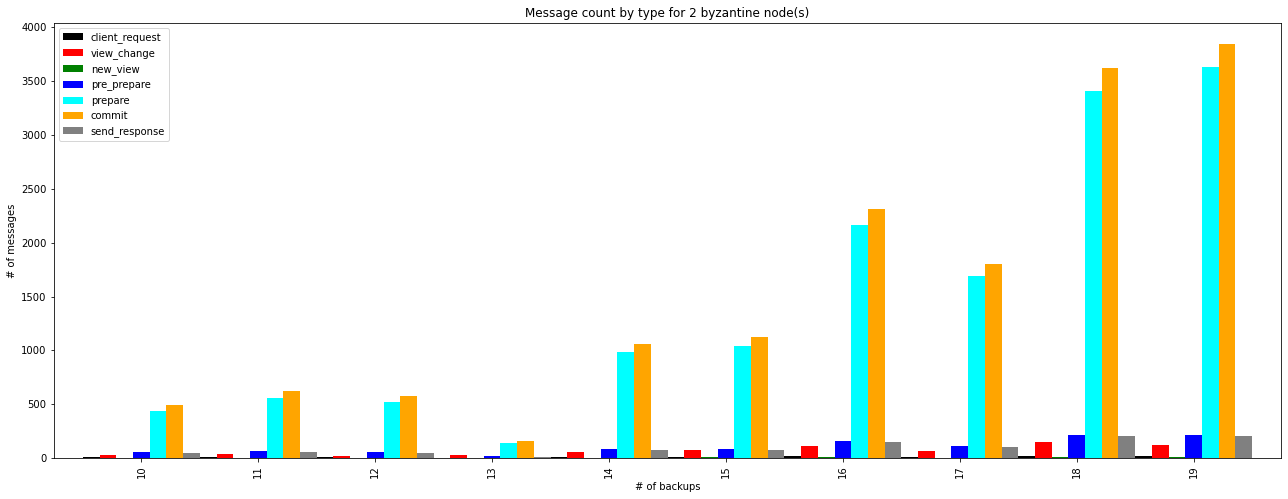

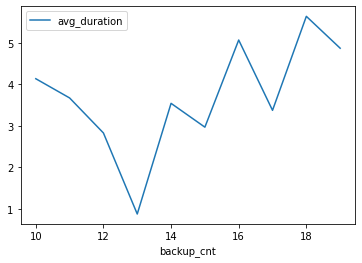

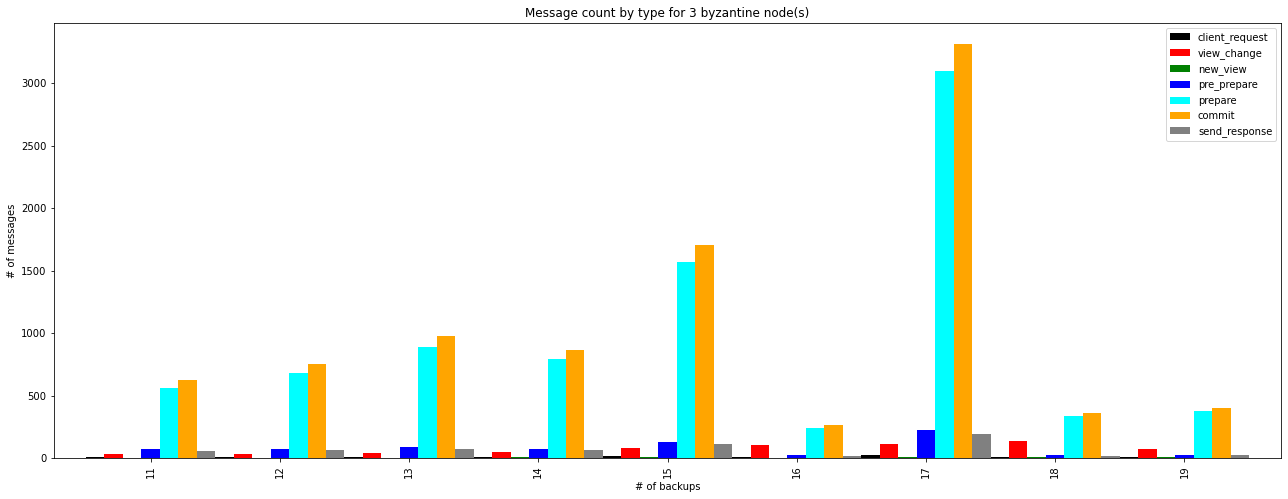

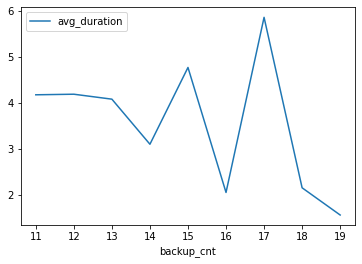

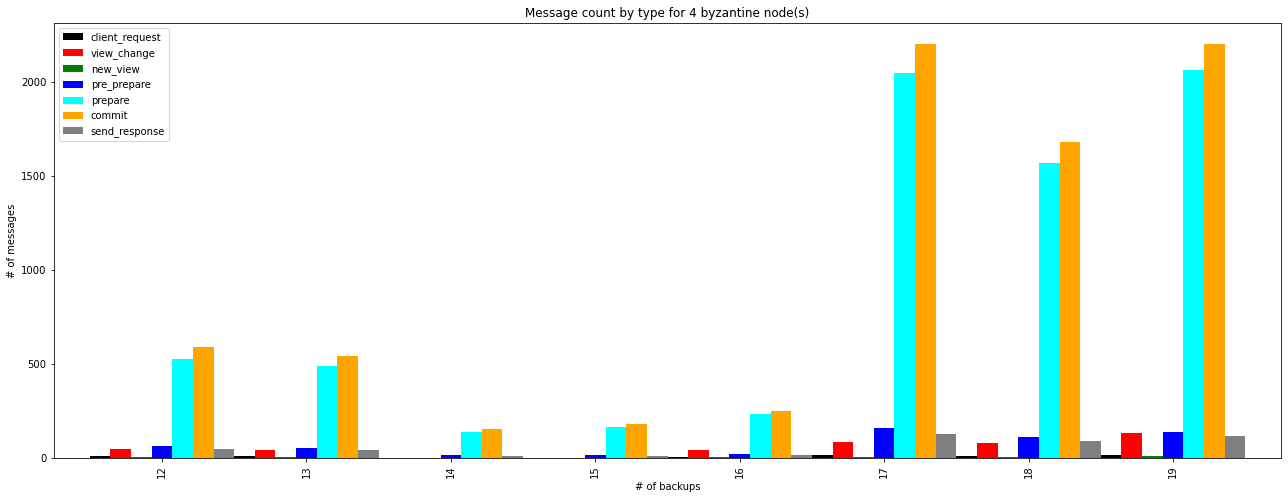

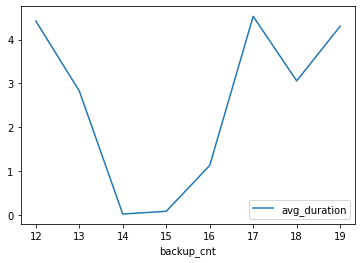

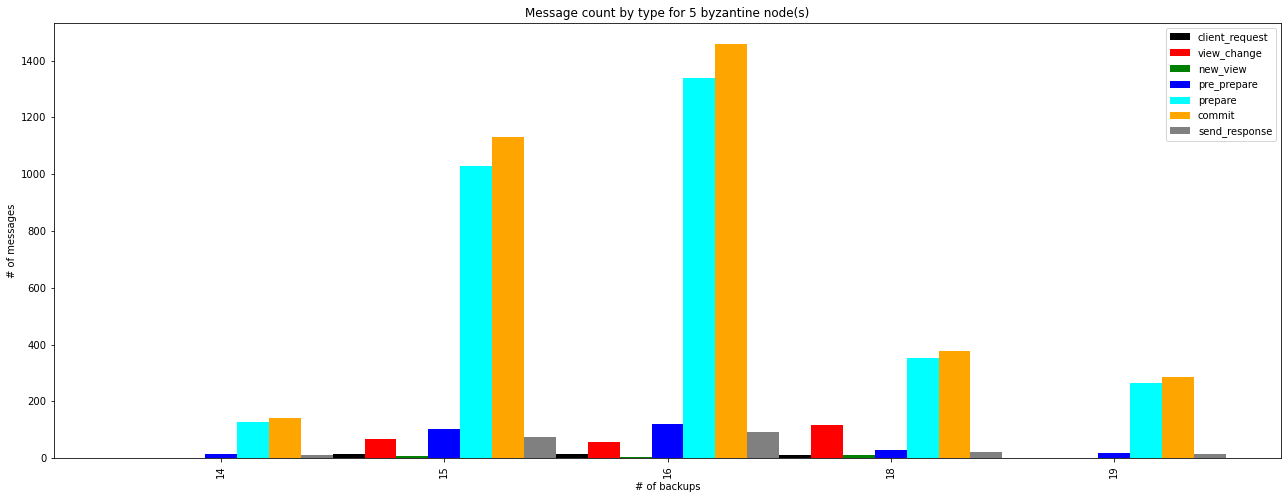

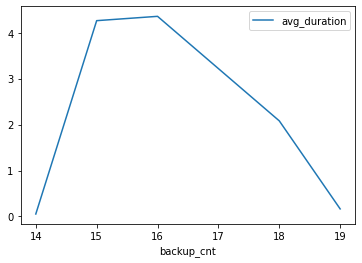

In [326]:
for i in range(6):
    df1 = df[df["byzantine_node_cnt"] == i]
    df1 = df1.groupby(by=["backup_cnt"], dropna=False).mean()
    df1 = df1.reset_index()

    # noticed extremely rare cases where due to time lags a primary was declared as faulty.
    if i == 0:
        df1 = df1[df1["view_change"] == 0]

    df1.plot(x ='backup_cnt', y=['client_request', 'view_change', 'new_view', 'pre_prepare', 'prepare', 'commit', 'send_response'], kind = 'bar', 
    title='Message count by type for {} byzantine node(s)'.format(i), xlabel = '# of backups', ylabel='# of messages', figsize=(22, 8),
    color=['black', 'red', 'green', 'blue', 'cyan', 'orange', 'grey'], width=1.0)

    # df1.plot(x ='backup_cnt', y='avg_duration', kind='line')